In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report , accuracy_score
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder , MinMaxScaler, Imputer
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC,SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans

C:\Users\Shardul Janaskar\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
#Set path to the folder where the dataset is present
os.chdir("C:/Users/Shardul Janaskar/Downloads")

In [3]:
#Load the dataset
dataset_original = pd.read_csv("startup_funding.csv")

#Change the column headers to lowercase and impute missing value in the target column(amountinusd) with the median
dataset_original.columns = dataset_original.columns.str.lower()
dataset_original['amountinusd'] = dataset_original['amountinusd'].str.replace(",", "").astype(float)
imputer = Imputer(missing_values = 'NaN',strategy = 'median', axis = 0)       
dataset_original["amountinusd"] = imputer.fit_transform(dataset_original[['amountinusd']])

In [4]:
#Visualizing how the funding scene changed with time (question 1)
#Making a new copy of the original dataframe
dataset_ecosystem = dataset_original.copy()

In [5]:
#Cleaning the date column
dataset_ecosystem["date"] = dataset_ecosystem['date'].str.replace(".","/")
dataset_ecosystem["date"] = dataset_ecosystem['date'].str.replace("//","/")
date_split = dataset_ecosystem["date"].str.split("/")

In [6]:
#Adding a new month column
month=[]
for row in date_split:
    month.append(float(str(float(row[1]))))
dataset_ecosystem["month"] = pd.Series(month)

In [7]:
#Adding a new year column
year=[]
for row in date_split:
    year.append(float(str(float(row[2]))))
dataset_ecosystem["year"] = pd.Series(year)

In [8]:
#Selecting the necessary columns
dataset_ecosystem = dataset_ecosystem[["month","year","amountinusd"]]

In [9]:
#Grouping data by year and month
funds_2015 = dataset_ecosystem[dataset_ecosystem["year"]==2015].groupby(["month"],sort=True)["amountinusd"].sum()
funds_2016 = dataset_ecosystem[dataset_ecosystem["year"]==2016].groupby(["month"],sort=True)["amountinusd"].sum()
funds_2017 = dataset_ecosystem[dataset_ecosystem["year"]==2017].groupby(["month"],sort=True)["amountinusd"].sum()

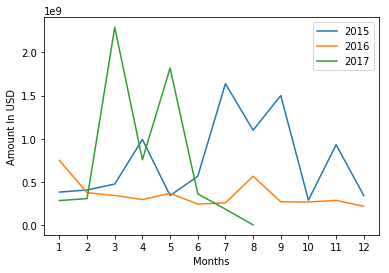

In [17]:
#Plotting how the funds received by startups varied during the year for the years 2015,2016,2017
plt.plot(funds_2015.index,funds_2015.values)
plt.plot(funds_2016.index,funds_2016.values)
plt.plot(funds_2017.index,funds_2017.values)
plt.xlabel("Months")
plt.ylabel("Amount In USD")
plt.xticks(range(1,13))
labels= ["2015","2016", "2017"]
plt.legend(labels)
plt.show()

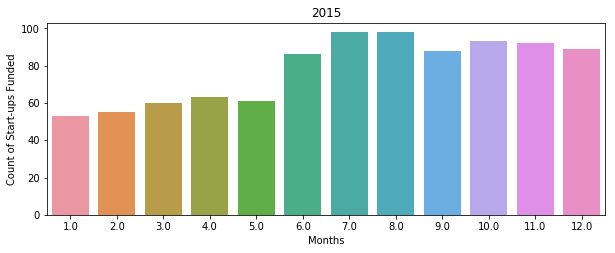

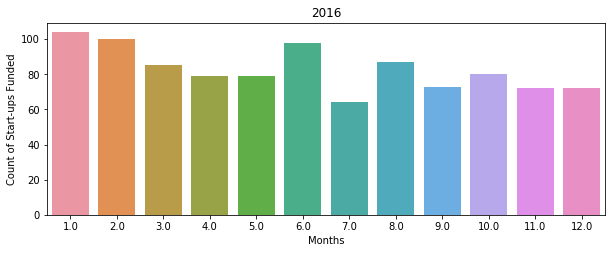

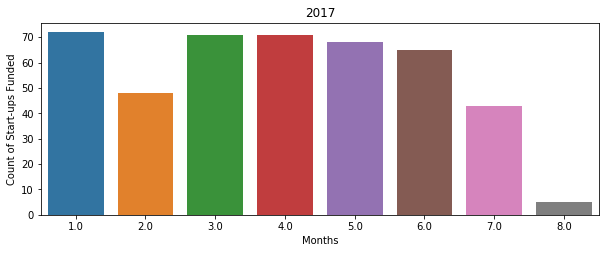

In [25]:
#PLotting the count of startups funded during the year for the years 2015,2016,2017
funds_2015 = dataset_ecosystem[dataset_ecosystem["year"]==2015].groupby(["month"],sort=True)["amountinusd"].count()
funds_2016 = dataset_ecosystem[dataset_ecosystem["year"]==2016].groupby(["month"],sort=True)["amountinusd"].count()
funds_2017 = dataset_ecosystem[dataset_ecosystem["year"]==2017].groupby(["month"],sort=True)["amountinusd"].count()
plt.figure(figsize=(10,12))
plt.subplot(311)
sns.barplot(x=funds_2015.index,y=funds_2015.values)
plt.xlabel("Months")
plt.ylabel("Count of Start-ups Funded")
plt.title("2015")
plt.show()
plt.figure(figsize=(10,12))
plt.subplot(312)
sns.barplot(x=funds_2016.index,y=funds_2016.values)
plt.xlabel("Months")
plt.ylabel("Count of Start-ups Funded")
plt.title("2016")
plt.show()
plt.figure(figsize=(10,12))
plt.subplot(313)
sns.barplot(x=funds_2017.index,y=funds_2017.values)
plt.xlabel("Months")
plt.ylabel("Count of Start-ups Funded")
plt.title("2017")
plt.show()

In [28]:
#Analyzing how does the location(city) of the startup affects the funding it receives (question 2)
#Making a new copy of the dataset
dataset_city = dataset_original.copy()
#Selecting the necessary columns
dataset_city = dataset_city[["citylocation","amountinusd"]]
#Removing the null values because they are very less (approx. 8 in 2000 entries)
dataset_city_clean = dataset_city[dataset_city["citylocation"].notnull()]

In [29]:
#Grouping the funds startup receive based on their city
dataset_city_grouped = dataset_city_clean.groupby(["citylocation"],sort=True)["amountinusd"].sum()
#Sorting the grouped start-ups according to the amount of funds they received in descending order
dataset_city_grouped.sort_values(ascending=False,inplace=True)

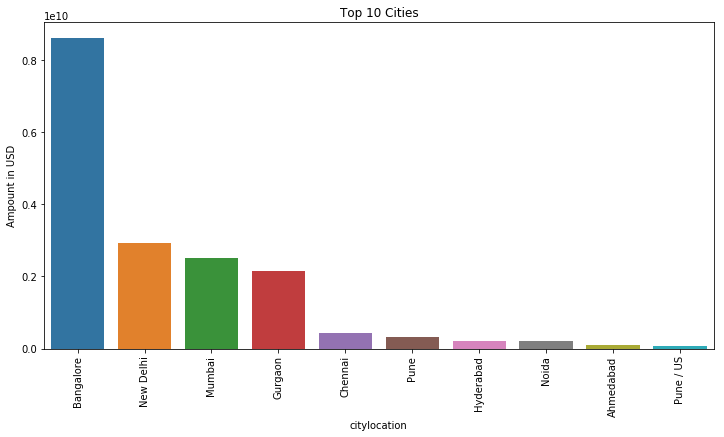

In [33]:
#Plotting the top 10 cities according to the funds start-ups in that city received
plt.figure(figsize=(12,6))
plt.xticks(rotation="vertical")
plt.xlabel("City-Location")
plt.ylabel("Ampount in USD")
plt.title("Top 10 Cities")
sns.barplot(x=dataset_city_grouped.index[:10],y=dataset_city_grouped.values[:10])
plt.show()

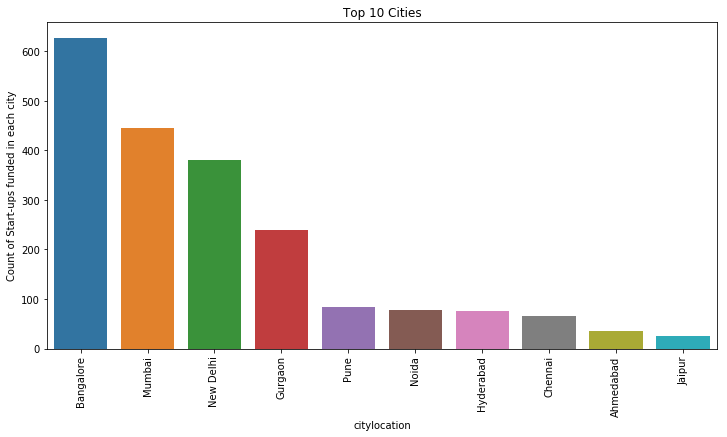

In [34]:
#Finding the count of start-ups funded in each city
dataset_city_grouped = dataset_city_clean.groupby(["citylocation"],sort=True)["amountinusd"].count()
dataset_city_grouped.sort_values(ascending=False,inplace=True)
plt.figure(figsize=(12,6))
plt.xticks(rotation="vertical")
plt.xlabel("City-Location")
plt.ylabel("Count of Start-ups funded in each city")
plt.title("Top 10 Cities")
sns.barplot(x=dataset_city_grouped.index[:10],y=dataset_city_grouped.values[:10])
plt.show()

In [16]:
#Which type(industry-vertical) of start-up received most funds (question 3)

In [17]:
#Making a copy of the original dataset
data_ind_fav = dataset_original[['industryvertical','amountinusd']]
#Removing the null values because they are very few
data_ind_fav = data_ind_fav[data_ind_fav["industryvertical"].notnull()]

In [18]:
#Grouping the funds start-ups received based on their industry-vertical
data_sum =  data_ind_fav.groupby(["industryvertical"],sort=True)["amountinusd"].sum()
#Sorting in descending order according to funds
data_sum.sort_values(ascending=False,inplace=True)

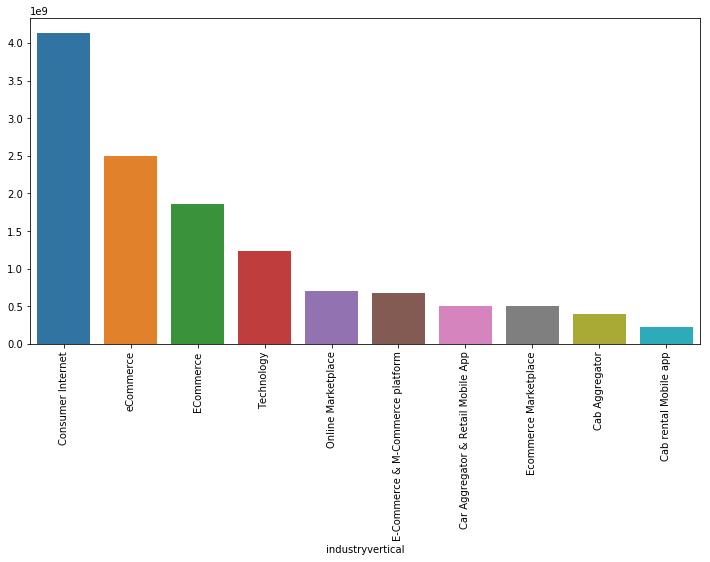

In [19]:
#Plotting the above values
plt.figure(figsize=(12,6))
plt.xticks(rotation="vertical")
sns.barplot(x=data_sum.index[:10],y=data_sum.values[:10])

In [20]:
#Determing the count of start-ups that received funds grouped by their industry-vertical
plot2 = data_ind_fav['industryvertical'].value_counts().head(10)

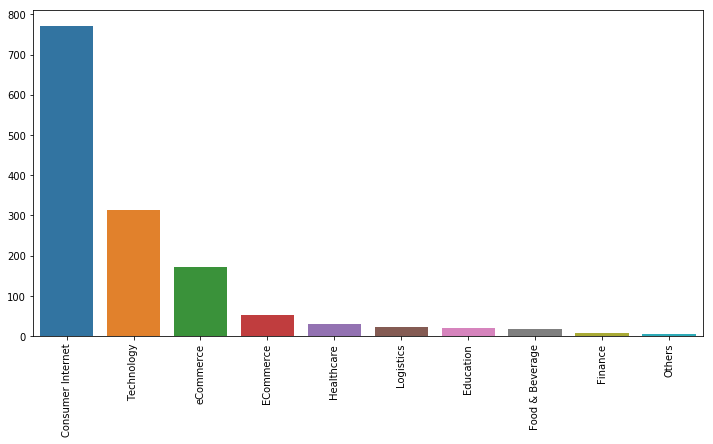

In [21]:
#Plotting the above values
plt.figure(figsize=(12,6))
plt.xticks(rotation="vertical")
sns.barplot(x=plot2.index[:10],y=plot2.values[:10])

In [22]:
#Determing which investor provides the greatest funding (question 4)

In [23]:
#Selecting the necessary columns
data_inv = dataset_original[['investorsname','amountinusd']]
#Removing the null values
data_inv = data_inv[data_inv["investorsname"].notnull()]

In [24]:
#Determining the total amount of funds each inevstor invested
data_inv_sum =  data_inv.groupby(["investorsname"],sort=True)["amountinusd"].sum()
#Sorting in desceding order
data_inv_sum.sort_values(ascending=False,inplace=True)

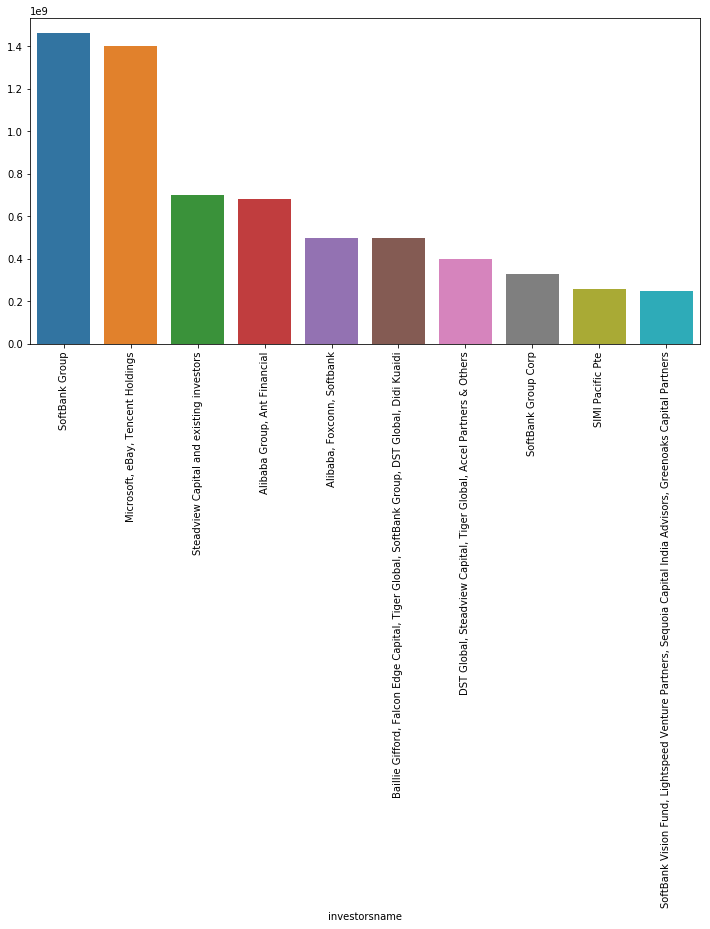

In [25]:
#Plotting the above data
plt.figure(figsize=(12,6))
plt.xticks(rotation="vertical")
sns.barplot(x=data_inv_sum.index[:10],y=data_inv_sum.values[:10])

In [26]:
#Determing the number of start-ups each investor invested in
plot = data_inv['investorsname'].value_counts().head(10)

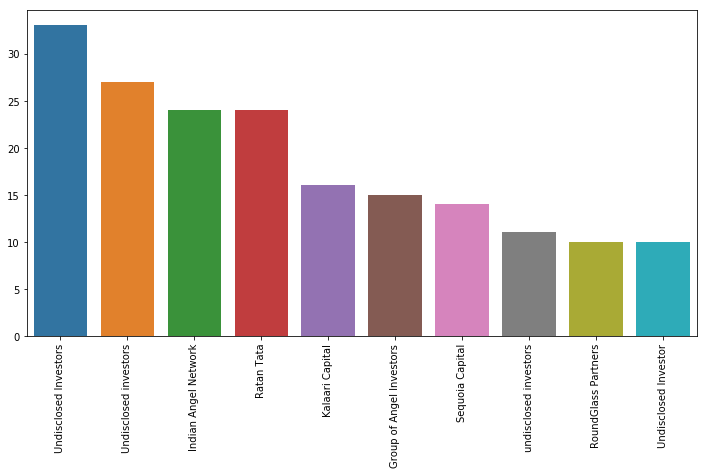

In [27]:
#Plotting the above data
plt.figure(figsize=(12,6))
plt.xticks(rotation="vertical")
sns.barplot(x=plot.index[:10],y=plot.values[:10])

In [28]:
#Determining which favoured investment type (question 7)
dataset_investment_type = dataset_original
#Determing the count of fundings received grouped by the invesstment type
dataset_investment_type = dataset_investment_type['investmenttype'].value_counts()

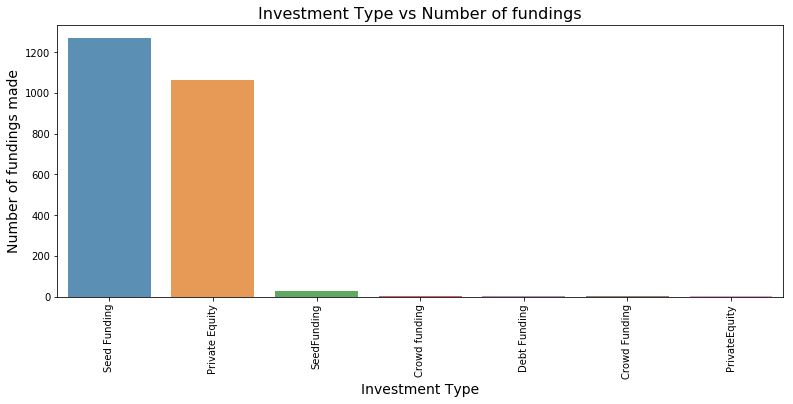

In [29]:
plt.figure(figsize=(13,5))
sns.barplot(dataset_investment_type.index, dataset_investment_type.values, alpha=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('Investment Type', fontsize=14)
plt.ylabel('Number of fundings made', fontsize=14)
plt.title("Investment Type vs Number of fundings", fontsize=16)
plt.show()

In [32]:
#Determing the total amount of funding of each investment type
dataset_investment_type = dataset_original.groupby("investmenttype")["amountinusd"].sum()
dataset_investment_type.sort_values(ascending=False, inplace=True)

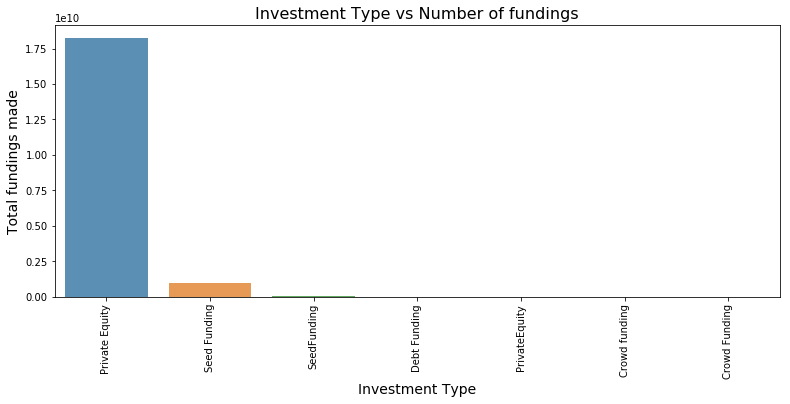

In [34]:
#Plotting the above values
plt.figure(figsize=(13,5))
sns.barplot(dataset_investment_type.index, dataset_investment_type.values, alpha=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('Investment Type', fontsize=14)
plt.ylabel('Total fundings made', fontsize=14)
plt.title("Investment Type vs Number of fundings", fontsize=16)
plt.show()